# Chapter 2 - Session 4
# Analysis - Raster Operations (Case Studies)

## Objectives
#### learn how to perform simple analysis on raster images and write back as seperate images 

## Content
#### 1) Case Study 1 - Simple Density Slicing 
#### 2) Case Study 2 - Calculating a Index (NDVI)
#### 3) Case Study 3 - Water Detection

<hr>

# 1) Case Study 1 - Simple Density Slicing 

Lets classify elevation data in to classes

### classify in to 2 classes of elevation

    elevation < 1500 m : class 0
    elevation >= 1500 m : class 1

In [1]:
'''lets first import libraries that we use early'''

import gdal
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''lets first read a image to matrix'''

img = gdal.Open('.//data//srtm_57_08_1.tif') 
band = img.GetRasterBand(1) 
mat_srtm = band.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize) 

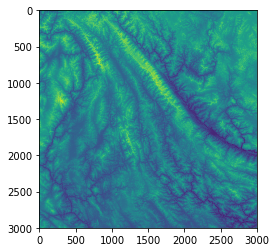

In [4]:
'''let's plot'''

plt.imshow(mat_srtm, vmin=0, vmax=3500)
plt.show()

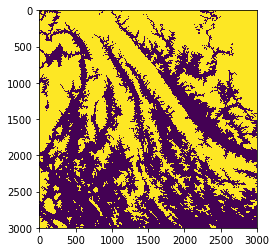

In [5]:
'''lets classify high , low elevation classes and plot new image'''

mat_srtm_cat = mat_srtm > 1500

plt.imshow(mat_srtm_cat, vmin=0, vmax=1)
plt.show()

### classify in to multiple classes of elevation

    0    - 1000 m : class 1
    1000 - 2000 m : class 2
    2000 - 3000 m : class 3
    3000 - 4000 m : class 4

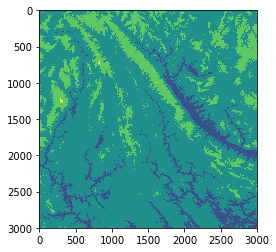

In [6]:
mat_srtm_cat = mat_srtm

mat_srtm_cat[(0<mat_srtm_cat) & (mat_srtm_cat<=1000)] = 1
mat_srtm_cat[(1000<mat_srtm_cat) & (mat_srtm_cat<=2000)] = 2
mat_srtm_cat[(2000<mat_srtm_cat) & (mat_srtm_cat<=3000)] = 3
mat_srtm_cat[(3000<mat_srtm_cat) & (mat_srtm_cat<=4000)] = 4

plt.imshow(mat_srtm_cat, vmin=0, vmax=4)
plt.show()

### Exercise 1

Classify elevation image to different classes of 500 m by 500 m

### Exercise 2

Perform class 2 elevation classifications for all DEM images in "srtm" folder and write results as seperate image file

# 2) Case Study 2 - Calculating a Index (NDVI)

In this sections, lets calculate index call NDVI (Normalized difference vegetation index) which is indication of vegetation level in a pixel

NDVI is calculated using near infrared band and red bands of satellite images. In this example, we will use data from MODIS

Equation for NDVI = (NIR-RED) / (NIR+RED)

Let's calculate NDVI values for 18 November 02 images located in "ndvi" folder

In [8]:
'''lets first read NIR image to matrix'''

img = gdal.Open('.//data//MODIS_18Nov02_NIR.tif') 
band = img.GetRasterBand(1) 
mat_nir= band.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize)

'''lets first read RED image to matrix'''

img = gdal.Open('.//data//MODIS_18Nov02_RED.tif') 
band = img.GetRasterBand(1) 
mat_red= band.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize) 

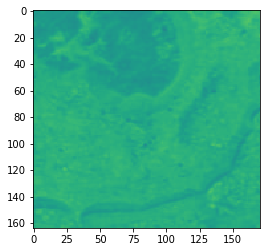

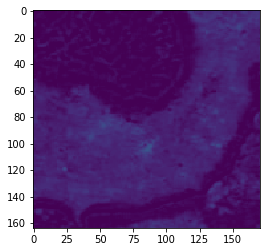

In [9]:
'''let's plot NDVI and Red bands'''

plt.imshow(mat_nir, vmin=0, vmax=255)
plt.show()

plt.imshow(mat_red, vmin=0, vmax=255)
plt.show()

In [10]:
'''since we are calculating index which include division, so we have to be careful about data type'''
'''lets check data type first'''

print(mat_nir.dtype)
print(mat_red.dtype)

'''since data type is integer and we need decimal numbers for division, lets convert data to float data type'''

mat_nir = mat_nir.astype('float')
mat_red = mat_red.astype('float')

print(mat_nir.dtype)
print(mat_red.dtype)

uint8
int8
float64
float64


In [11]:
'''lets calculate NDVI using formula'''

ndvi = (mat_nir-mat_red) / (mat_nir+mat_red)

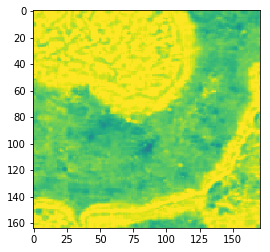

In [12]:
'''lets plot NDVI image'''
'''since NDVI varies between 0 and 1. we visualize only that range'''

plt.imshow(ndvi, vmin=0, vmax=1)
plt.show()

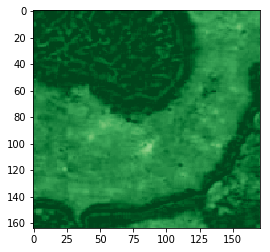

In [13]:
'''since NDVI is related to vegetation, lets choose color map with green color'''

plt.imshow(ndvi, vmin=0, vmax=1, cmap='Greens')
plt.show()

### Exercise 3

Save calculated NDVI as separate image

### Exercise 4

Calculate NDVI for 2018 December 17 images too and save as separate image

# 3) Case Study 3 - Water Detection

### Exercise 5

Read "MODIS_721-2017-02-06.tiff" from "water" folder and extract band 2 which is the NIR (near infrared band). Experiment and put suitable threshold to extract water extent and write resulted image in a separate image file

Note: NIR is very sensitive to water. so in NIR bands, we can clearly see water and land boundary clearly. so most remote sensing algorithms use NIR to extract water